# 1. The Machine Learning Landscape

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

%matplotlib inline

In [2]:
# Load the data
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1',
                             na_values="n/a")

In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [17]:
oecd_bli[oecd_bli.LOCATION == "TUR"].head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
27,TUR,Turkey,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,12.7,NaN,NaN
64,TUR,Turkey,HO_BASE,Dwellings without basic facilities,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,12.7,E,Estimated value
100,TUR,Turkey,HO_BASE,Dwellings without basic facilities,L,Value,WMN,Women,PC,Percentage,0,units,NaN,NaN,12.7,E,Estimated value
136,TUR,Turkey,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,21.0,E,Estimated value
173,TUR,Turkey,HO_HISH,Housing expenditure,L,Value,MN,Men,PC,Percentage,0,units,NaN,NaN,21.0,E,Estimated value


In [12]:
oecd_bli.pivot_table(index="Country", columns="Indicator", values="Value")

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.100000,10.5,1.1,76.333333,13.730000,70.8,0.833333,33785.600000,47657.0,...,1.130103,48134.4,92.25,2.3,84.8,512.6,14.403333,93.0,91.000000,19.300000
Austria,27.0,3.466667,7.1,1.0,83.000000,7.510000,70.2,0.400000,32778.800000,49887.0,...,1.336836,43414.2,90.50,1.6,69.4,500.2,14.403333,75.8,94.333333,17.033333
Belgium,21.0,6.600000,4.5,2.0,72.000000,4.536667,60.8,1.066667,29498.000000,83876.0,...,4.250667,46889.4,94.25,2.2,73.4,510.8,15.666667,89.8,86.666667,18.900000
Brazil,18.0,7.866667,4.0,6.7,44.666667,10.223333,69.2,26.000000,13954.000000,6844.0,...,1.789174,16156.2,89.00,1.6,70.0,404.0,14.946667,79.6,72.333333,16.300000
Canada,15.0,1.333333,10.5,0.2,89.000000,3.926667,69.0,1.500000,31343.200000,67913.0,...,1.054863,46276.4,92.50,2.5,88.2,523.8,14.243333,61.2,91.000000,17.233333
Chile,46.0,6.900000,2.0,9.4,57.333333,14.550000,64.0,4.433333,17548.600000,17733.0,...,1.535284,20490.2,85.40,1.2,60.6,438.8,14.380000,50.2,73.000000,16.500000
Czech Republic,16.0,2.833333,6.8,0.9,92.333333,6.763333,61.8,0.833333,19374.600000,17299.0,...,4.499699,19416.8,84.60,1.4,61.0,501.4,14.956667,59.0,85.000000,18.100000
Denmark,15.0,3.966667,7.0,0.9,78.000000,2.016667,71.6,0.300000,27652.000000,44488.0,...,1.882167,45568.0,94.75,1.9,73.2,498.8,16.060000,88.0,93.666667,19.433333
Estonia,9.0,5.500000,3.3,8.1,89.666667,3.316667,64.4,4.966667,16160.600000,7680.0,...,4.212961,18218.4,89.20,1.5,55.8,529.4,14.886667,62.8,79.000000,17.500000


In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [20]:
country_stats["GDP per capita"].shape

(29,)

In [ ]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)


In [38]:
country_stats["GDP per capita"].shape

(29,)

In [39]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

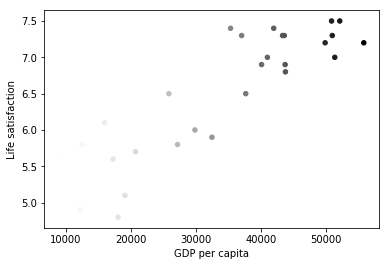

In [37]:

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', c=country_stats["GDP per capita"]);

In [21]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [18]:
X.shape

(29, 1)

In [19]:
y.shape

(29, 1)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[ 5.96242338]]


In [22]:
model.coef_ # w  = 4.91 10^-5

array([[  4.91154459e-05]])

In [23]:
model.intercept_ # b =  4.85

array([ 4.8530528])

In [25]:
model.n_jobs

1

In [26]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [27]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [28]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 

[[ 5.76666667]]


you would have predicted a life satisfaction of 5.7 for Cyprus.

## Main Challenges of Machine Learning

“bad algorithm” and “bad data.”